In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [4]:
cat=[]
num=[]
for i in df:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)

In [5]:
cat

['Education_Level',
 'Occupation',
 'Location',
 'Marital_Status',
 'Employment_Status',
 'Homeownership_Status',
 'Type_of_Housing',
 'Gender',
 'Primary_Mode_of_Transportation']

In [6]:
num

['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size', 'Income']

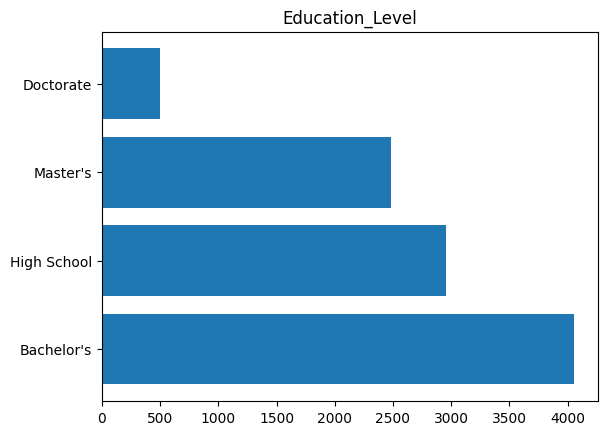

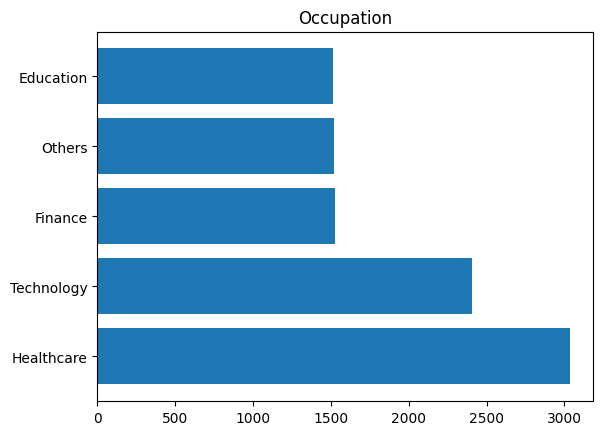

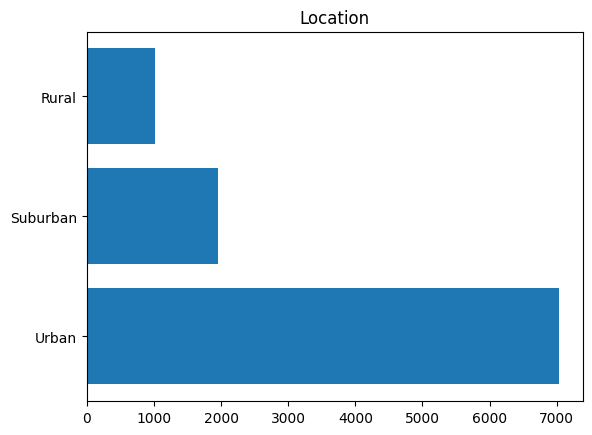

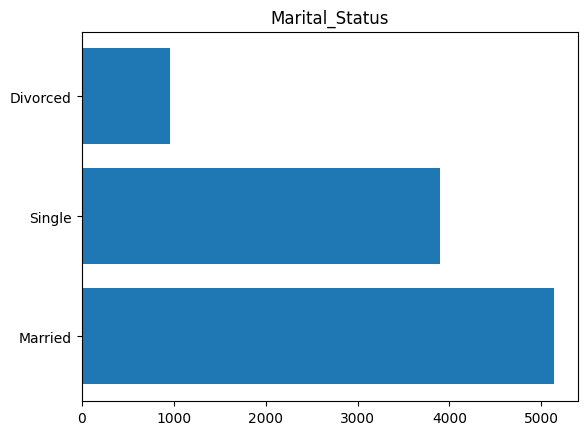

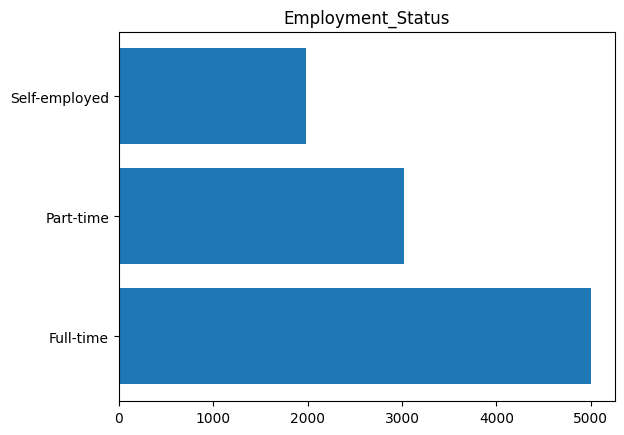

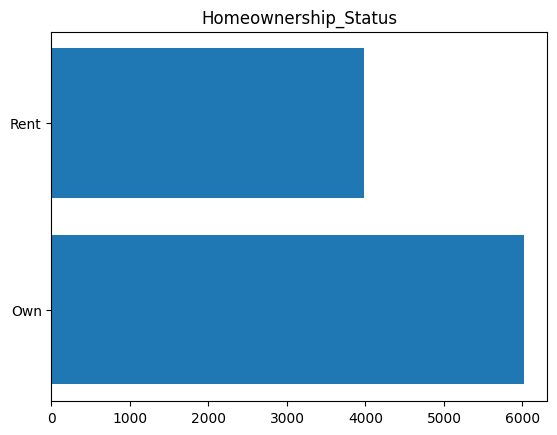

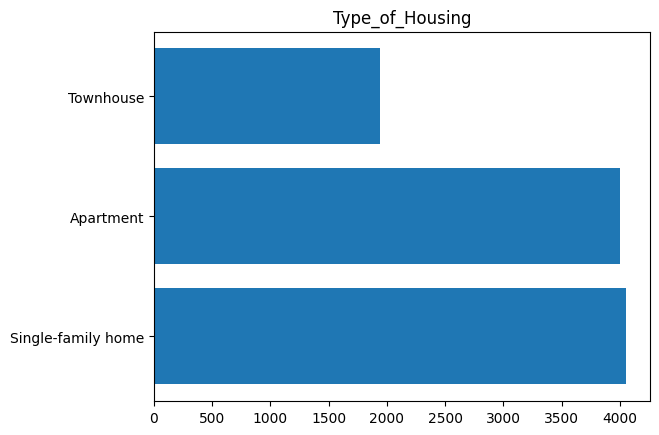

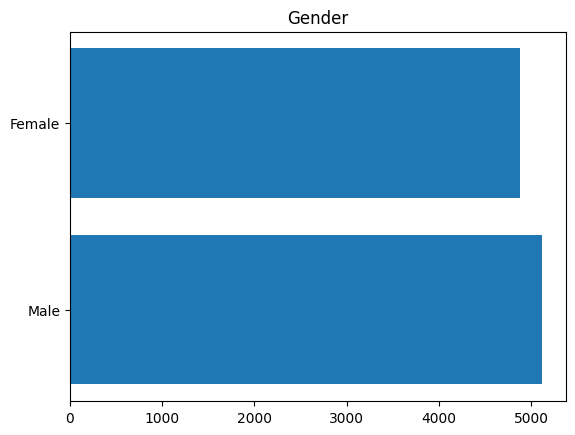

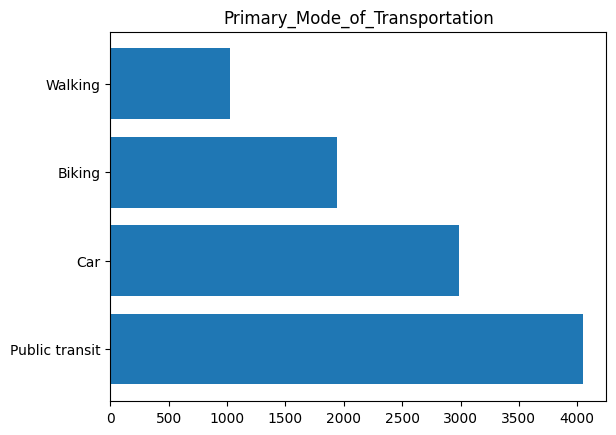

In [7]:
for i in cat:
  vc = df[i].value_counts()
  plt.barh(y=vc.index, width=vc)
  plt.title(i)
  plt.show()

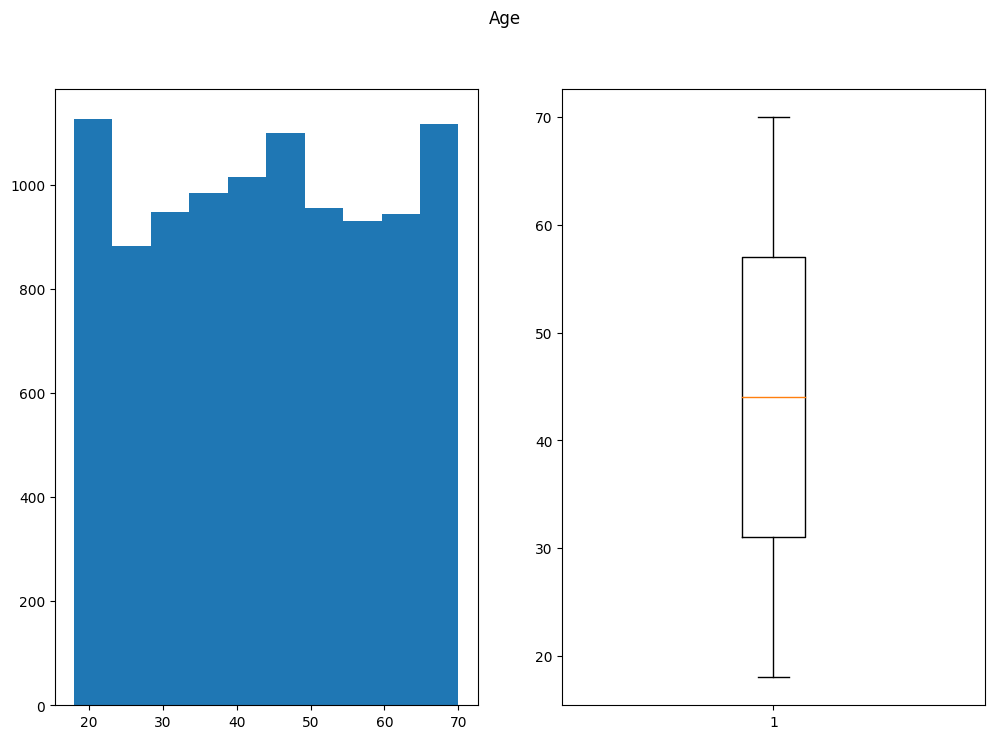

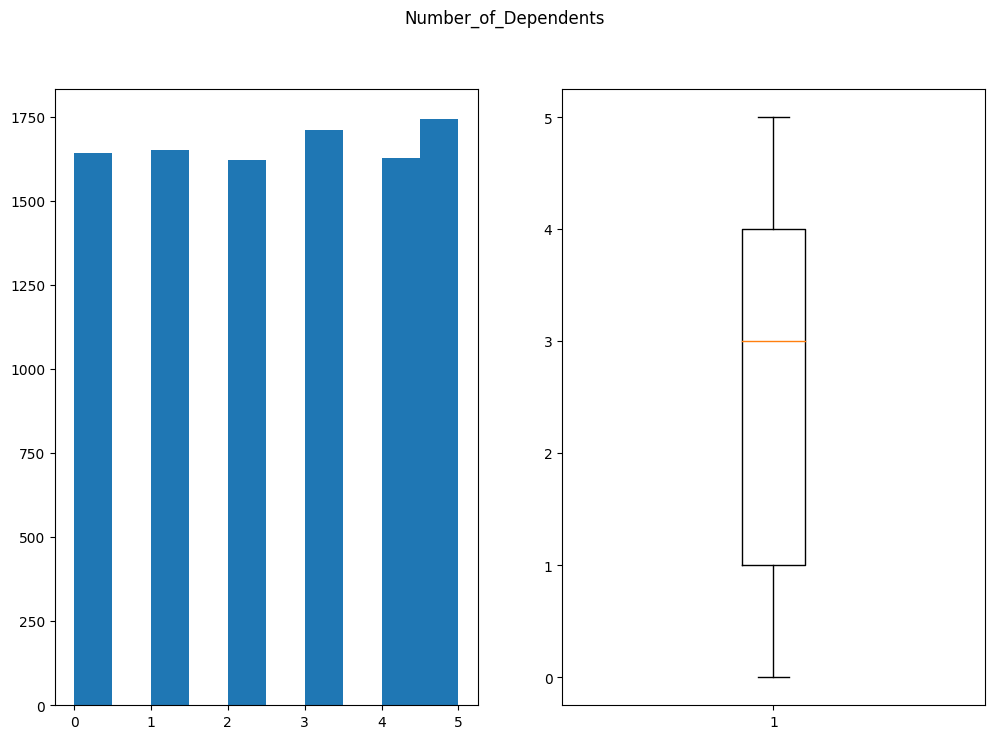

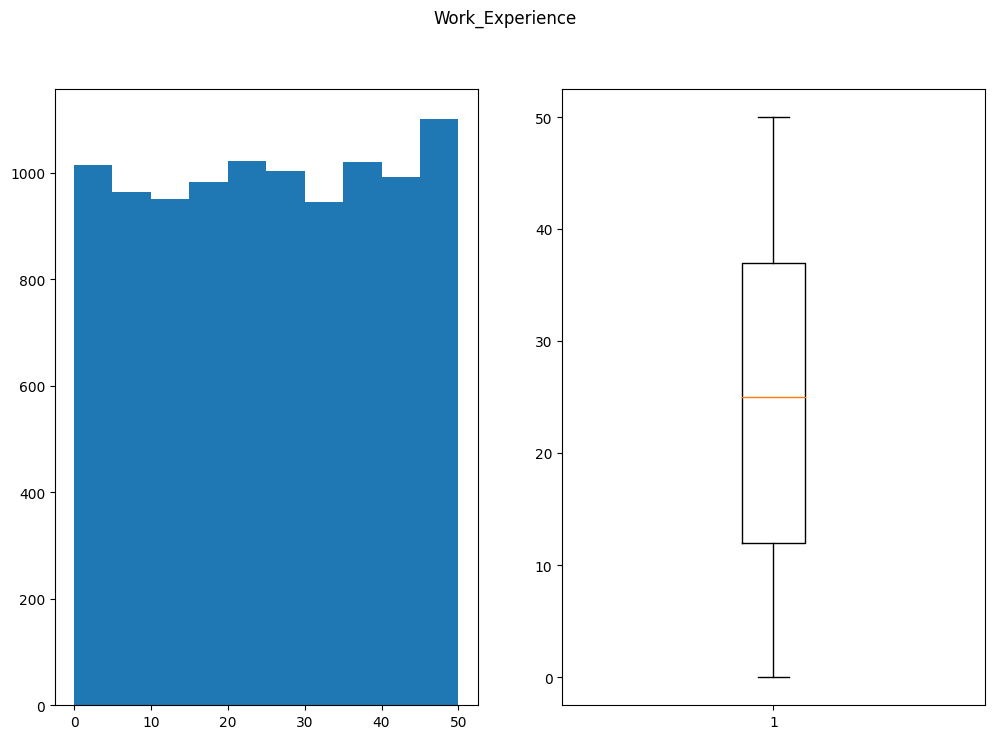

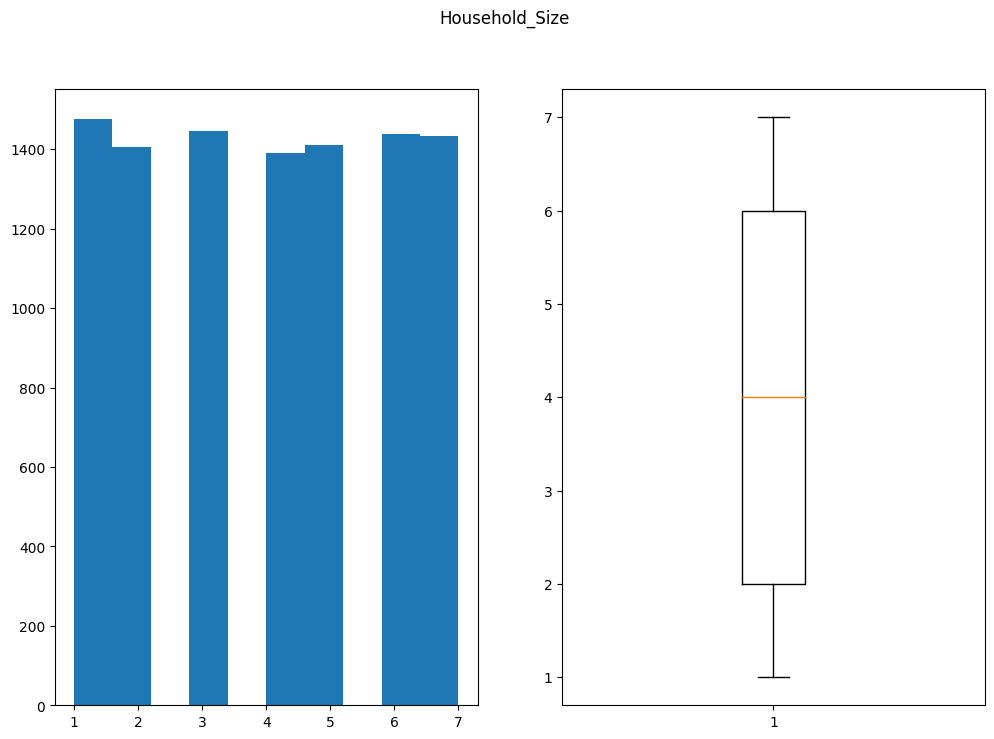

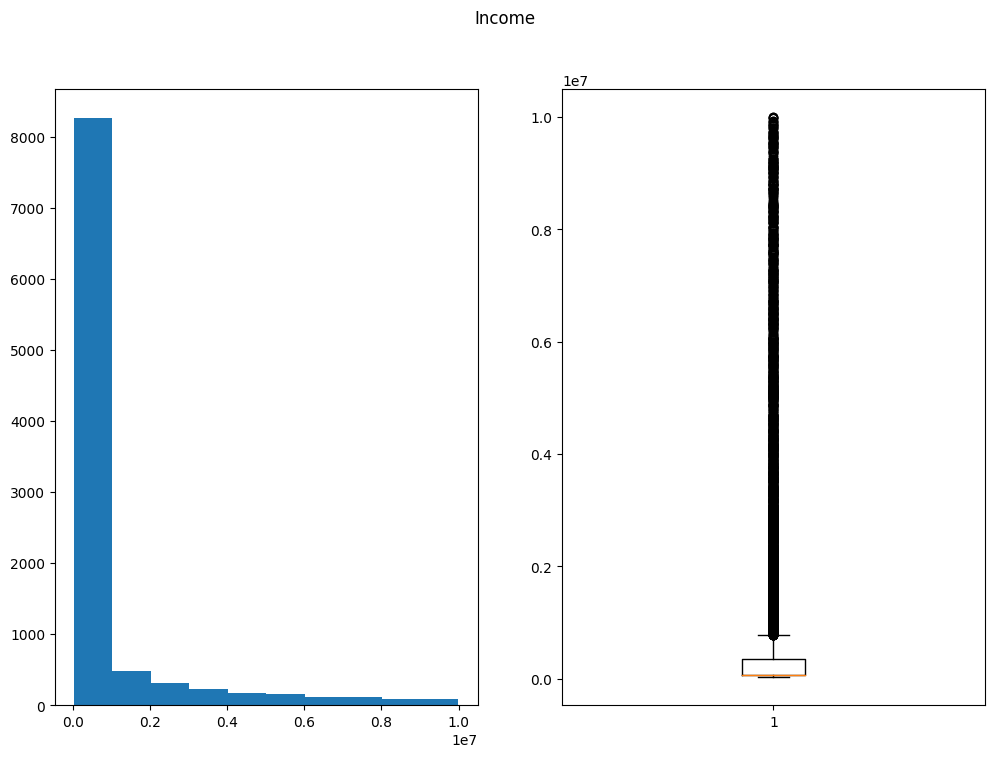

In [8]:
for i in num:
  fix, ax = plt.subplots(1,2,figsize=(12,8))
  ax[0].hist(df[i])
  ax[1].boxplot(df[i])
  plt.suptitle(i)
  plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
df['Education_Level'].replace(to_replace=['High School',"Bachelor's","Master's","Doctorate"],
                              value=[0,1,2,3], inplace=True)

In [11]:
df['Occupation'].value_counts()

,count
Occupation,
Healthcare,3035
Technology,2407
Finance,1525
Others,1521
Education,1512


In [12]:
ohe_occ = OneHotEncoder(sparse_output=False)
occ_arr=ohe_occ.fit_transform(df[['Occupation']])
occ_df = pd.DataFrame(occ_arr, columns=ohe_occ.categories_)

In [13]:
import seaborn as sns
occ_df = occ_df.iloc[:,1:]

In [14]:
df['Location'].replace(to_replace=['Urban','Suburban','Rural'],
                       value=[2,1,0], inplace=True)

In [16]:
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,2,Technology,5,2,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,0,Finance,0,2,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,1,Technology,1,2,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,0,Others,2,2,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,1,Finance,3,2,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,0,Others,0,1,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,2,Technology,3,2,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,3,Education,3,2,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,0,Education,0,2,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [15]:
ohe_ms = OneHotEncoder(sparse_output=False)
ms_arr=ohe_ms.fit_transform(df[['Marital_Status']])
ms = pd.DataFrame(ms_arr, columns=ohe_ms.categories_)
ms=ms.iloc[:,1:]
ms

,Married,Single
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,1.0
9998,1.0,0.0


In [17]:
ohe_es = OneHotEncoder(sparse_output=False)
es_arr=ohe_es.fit_transform(df[['Employment_Status']])
es = pd.DataFrame(es_arr, columns=ohe_es.categories_)
es=es.iloc[:,1:]
es

,Part-time,Self-employed
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,0.0
9998,1.0,0.0


In [18]:
df['Homeownership_Status'].replace(to_replace=['Own','Rent'],
                       value=[1,2], inplace=True)

In [19]:
df['Homeownership_Status'].value_counts()

,count
Homeownership_Status,
1,6018
2,3982


In [20]:
ohe_th = OneHotEncoder(sparse_output=False)
th_arr=ohe_th.fit_transform(df[['Type_of_Housing']])
th = pd.DataFrame(th_arr, columns=ohe_th.categories_)
th=th.iloc[:,1:]
th

,Single-family home,Townhouse
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,1.0
9996,1.0,0.0
9997,1.0,0.0
9998,1.0,0.0


In [24]:
df['Gender'].replace(to_replace=['Male','Female'],
                       value=[1,0], inplace=True)

In [25]:
df['Gender'].value_counts()

,count
Gender,
0,5123
1,4877


In [26]:
df['Primary_Mode_of_Transportation'].value_counts()

,count
Primary_Mode_of_Transportation,
Public transit,4047
Car,2986
Biking,1940
Walking,1027


In [27]:
ohe_pm = OneHotEncoder(sparse_output=False)
pm_arr=ohe_pm.fit_transform(df[['Primary_Mode_of_Transportation']])
pm = pd.DataFrame(pm_arr, columns=ohe_pm.categories_)
pm=pm.iloc[:,1:]
pm

,Car,Public transit,Walking
0,0.0,1.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,0.0,0.0,0.0
9997,0.0,1.0,0.0
9998,0.0,0.0,0.0


In [28]:
X = df.drop(['Primary_Mode_of_Transportation','Type_of_Housing','Employment_Status','Marital_Status','Occupation','Income'],axis=1)

In [29]:
X

,Age,Education_Level,Number_of_Dependents,Location,Work_Experience,Household_Size,Homeownership_Status,Gender
0,56,2,5,2,21,7,1,0
1,69,0,0,2,4,7,1,0
2,46,1,1,2,1,7,1,1
3,32,0,2,2,32,1,1,1
4,60,1,3,2,15,4,1,0
...,...,...,...,...,...,...,...,...
9995,58,0,0,1,26,6,1,1
9996,23,2,3,2,16,1,1,1
9997,41,3,3,2,50,4,1,1
9998,44,0,0,2,3,1,1,0


In [30]:
X = pd.concat([X,pm,th,es,ms,occ_df],axis=1)

In [31]:
X

,Age,Education_Level,Number_of_Dependents,Location,Work_Experience,Household_Size,Homeownership_Status,Gender,"(Car,)","(Public transit,)",...,"(Single-family home,)","(Townhouse,)","(Part-time,)","(Self-employed,)","(Married,)","(Single,)","(Finance,)","(Healthcare,)","(Others,)","(Technology,)"
0,56,2,5,2,21,7,1,0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,69,0,0,2,4,7,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,46,1,1,2,1,7,1,1,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,32,0,2,2,32,1,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,60,1,3,2,15,4,1,0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,0,0,1,26,6,1,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,23,2,3,2,16,1,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,41,3,3,2,50,4,1,1,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9998,44,0,0,2,3,1,1,0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
y=df['Income']
y

,Income
0,72510
1,75462
2,71748
3,74520
4,640210
5,73406
6,3584362
7,70066
8,69636
9,5188124


In [33]:
X = X.values
y = y.values

In [34]:
!pip install tensorflow

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
model = Sequential()

In [40]:
model.add(Dense(128,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [42]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 4093927751680.0000 - mae: 821453.8125 - val_loss: 4230992625664.0000 - val_mae: 848705.0625
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4042270703616.0000 - mae: 825940.2500 - val_loss: 4223808307200.0000 - val_mae: 844550.2500
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4099754688512.0000 - mae: 833361.8125 - val_loss: 4162782756864.0000 - val_mae: 809217.8125
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3583909560320.0000 - mae: 722722.6875 - val_loss: 3921155457024.0000 - val_mae: 819028.6250
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3768648466432.0000 - mae: 854260.8125 - val_loss: 3572572880896.0000 - val_mae: 992667.6875
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3270636470272.0000 - mae: 1008370.0625 - val_loss: 3488263438336.0000 - val_mae: 1131609.7500
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3291322253312.0000 - mae: 11217

In [43]:
loss, mae = model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2892425592832.0000 - mae: 1013401.0000


In [44]:
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  1028855.3125


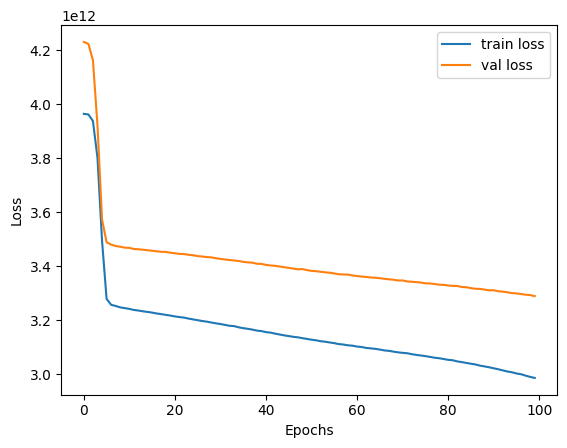

In [45]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()